In [ ]:
import numpy as np
from patchify import patchify
import skimage.io as io
from skimage import color
from utils import show_images
from color_transfer import color_transfer
from skimage.exposure import match_histograms
import cv2

In [ ]:
def irls(X,z,r,style,Iirls,patch_size,subsampling_gap):
    Xp=patchify(X,patch_size,subsampling_gap)
    num_of_patches=(np.shape(Xp)[0]+1)*(np.shape(Xp)[1]+1)
    w=(np.ones((num_of_patches,1))).astype(float)

    # z should be initilized with patch matching
    for i in range(0,Iirls):
        for x in range(0,np.shape(Xp)[0]):
            for y in range(0,np.shape(Xp)[1]):
                e=Xp[x,y,0,:,:,:]-z[x,y,0,:,:,:]
                e2=np.sum(e**2)**0.5+0.00001
                w[x*np.shape(Xp)[0]+y]=(e2**(r-2))
                Xp[x,y,0,:,:,:]+=(z[x,y,0,:,:,:]-Xp[x,y,0,:,:,:])*w[x*np.shape(Xp)[0]+y]

In [ ]:
img=io.imread("imgs/resurfacing-3-high-resolution-hilary-winfield.jpg").astype(float)
X=io.imread("imgs/vat.jpg").astype(float)
X=cv2.resize(X,(np.shape(img)[1],np.shape(img)[0]))
img=cv2.resize(img,(np.shape(X)[1],np.shape(X)[0]))
imgp=patchify(img,(20,20,3),20)
irls(X,imgp,1.6,img,10,(20,20,3),20)

show_images([img/255,X/255])

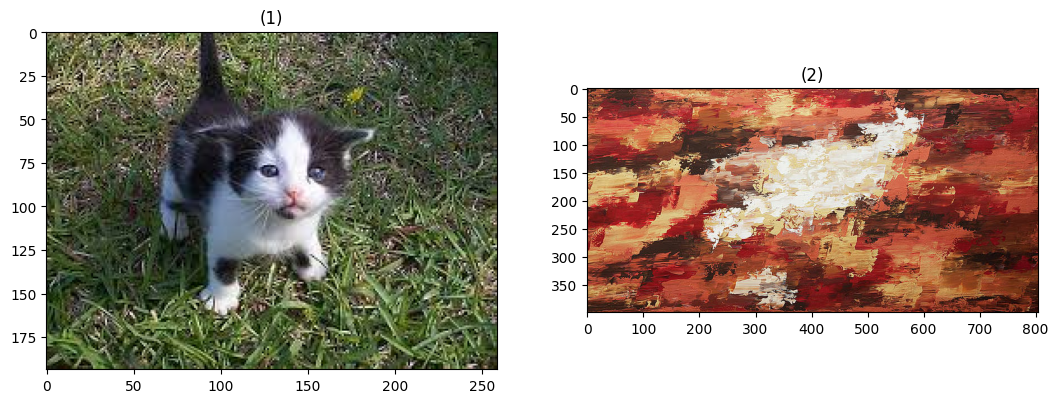

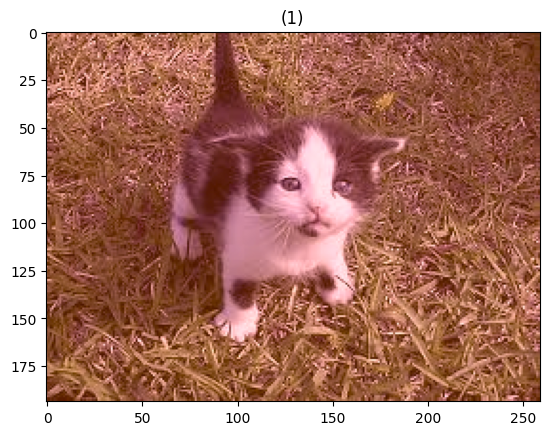

In [229]:
from color_transfer import color_transfer

img=io.imread("imgs/resurfacing-3-high-resolution-hilary-winfield.jpg")
X=io.imread("imgs/cat.jpg")
show_images([X,img])
X=color_transfer(X,img)

show_images([X])